In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro
data = pd.read_csv('./data/train.csv')

# Data Categories Explanation

- **FAVC**: Frequent consumption of high caloric food
- **FCVC**: Frequency of consumption of vegetables
- **NCP**: Number of main meals
- **CAEC**: Consumption of food between meals
- **CH2O**: Consumption of water daily
- **CALC**: Consumption of alcohol
- **SCC**: Calories consumption monitoring
- **FAF**: Physical activity frequency
- **TUE**: Time using technology devices
- **MTRANS**: Transportation used

Target Category: **NObeyesdad**


# Distribuição da variável-alvo por classe

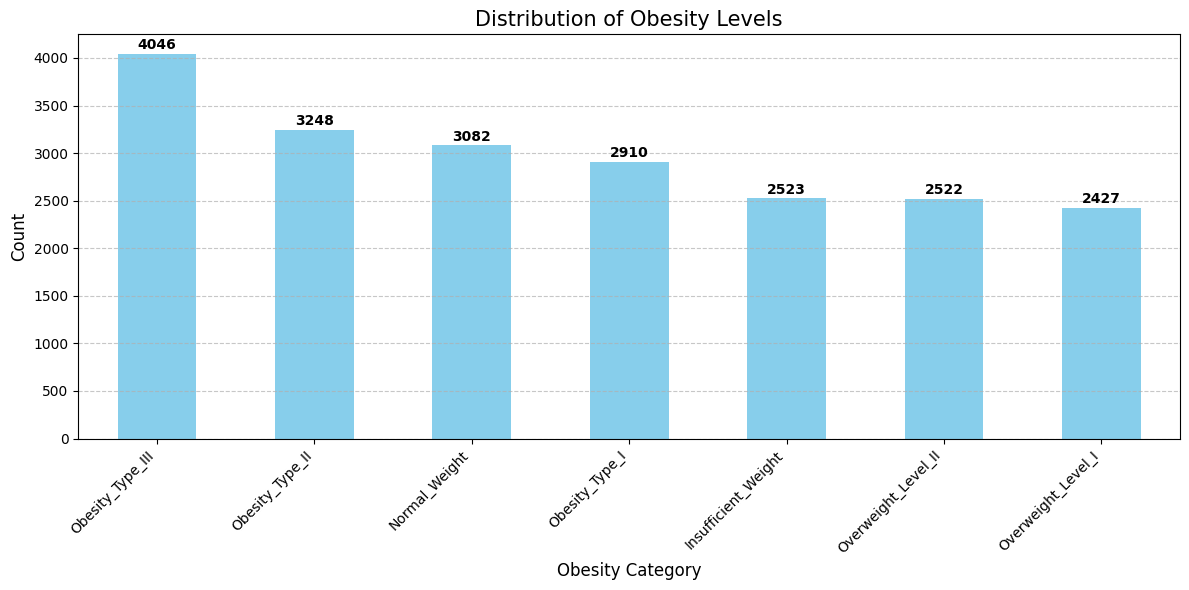

In [2]:
# Count the frequency of each category in the target variable
obesity_counts = data['NObeyesdad'].value_counts()

# Create a bar plot
plt.pyplot.figure(figsize=(12, 6))
bar_plot = obesity_counts.plot(kind='bar', color='skyblue')
plt.pyplot.title('Distribution of Obesity Levels', fontsize=15)
plt.pyplot.xlabel('Obesity Category', fontsize=12)
plt.pyplot.ylabel('Count', fontsize=12)
plt.pyplot.xticks(rotation=45, ha='right')
plt.pyplot.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, count in enumerate(obesity_counts):
    plt.pyplot.text(i, count + 50, str(count), ha='center', fontweight='bold')

plt.pyplot.tight_layout()

In [3]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


# Análise de Variáveis Categóricas

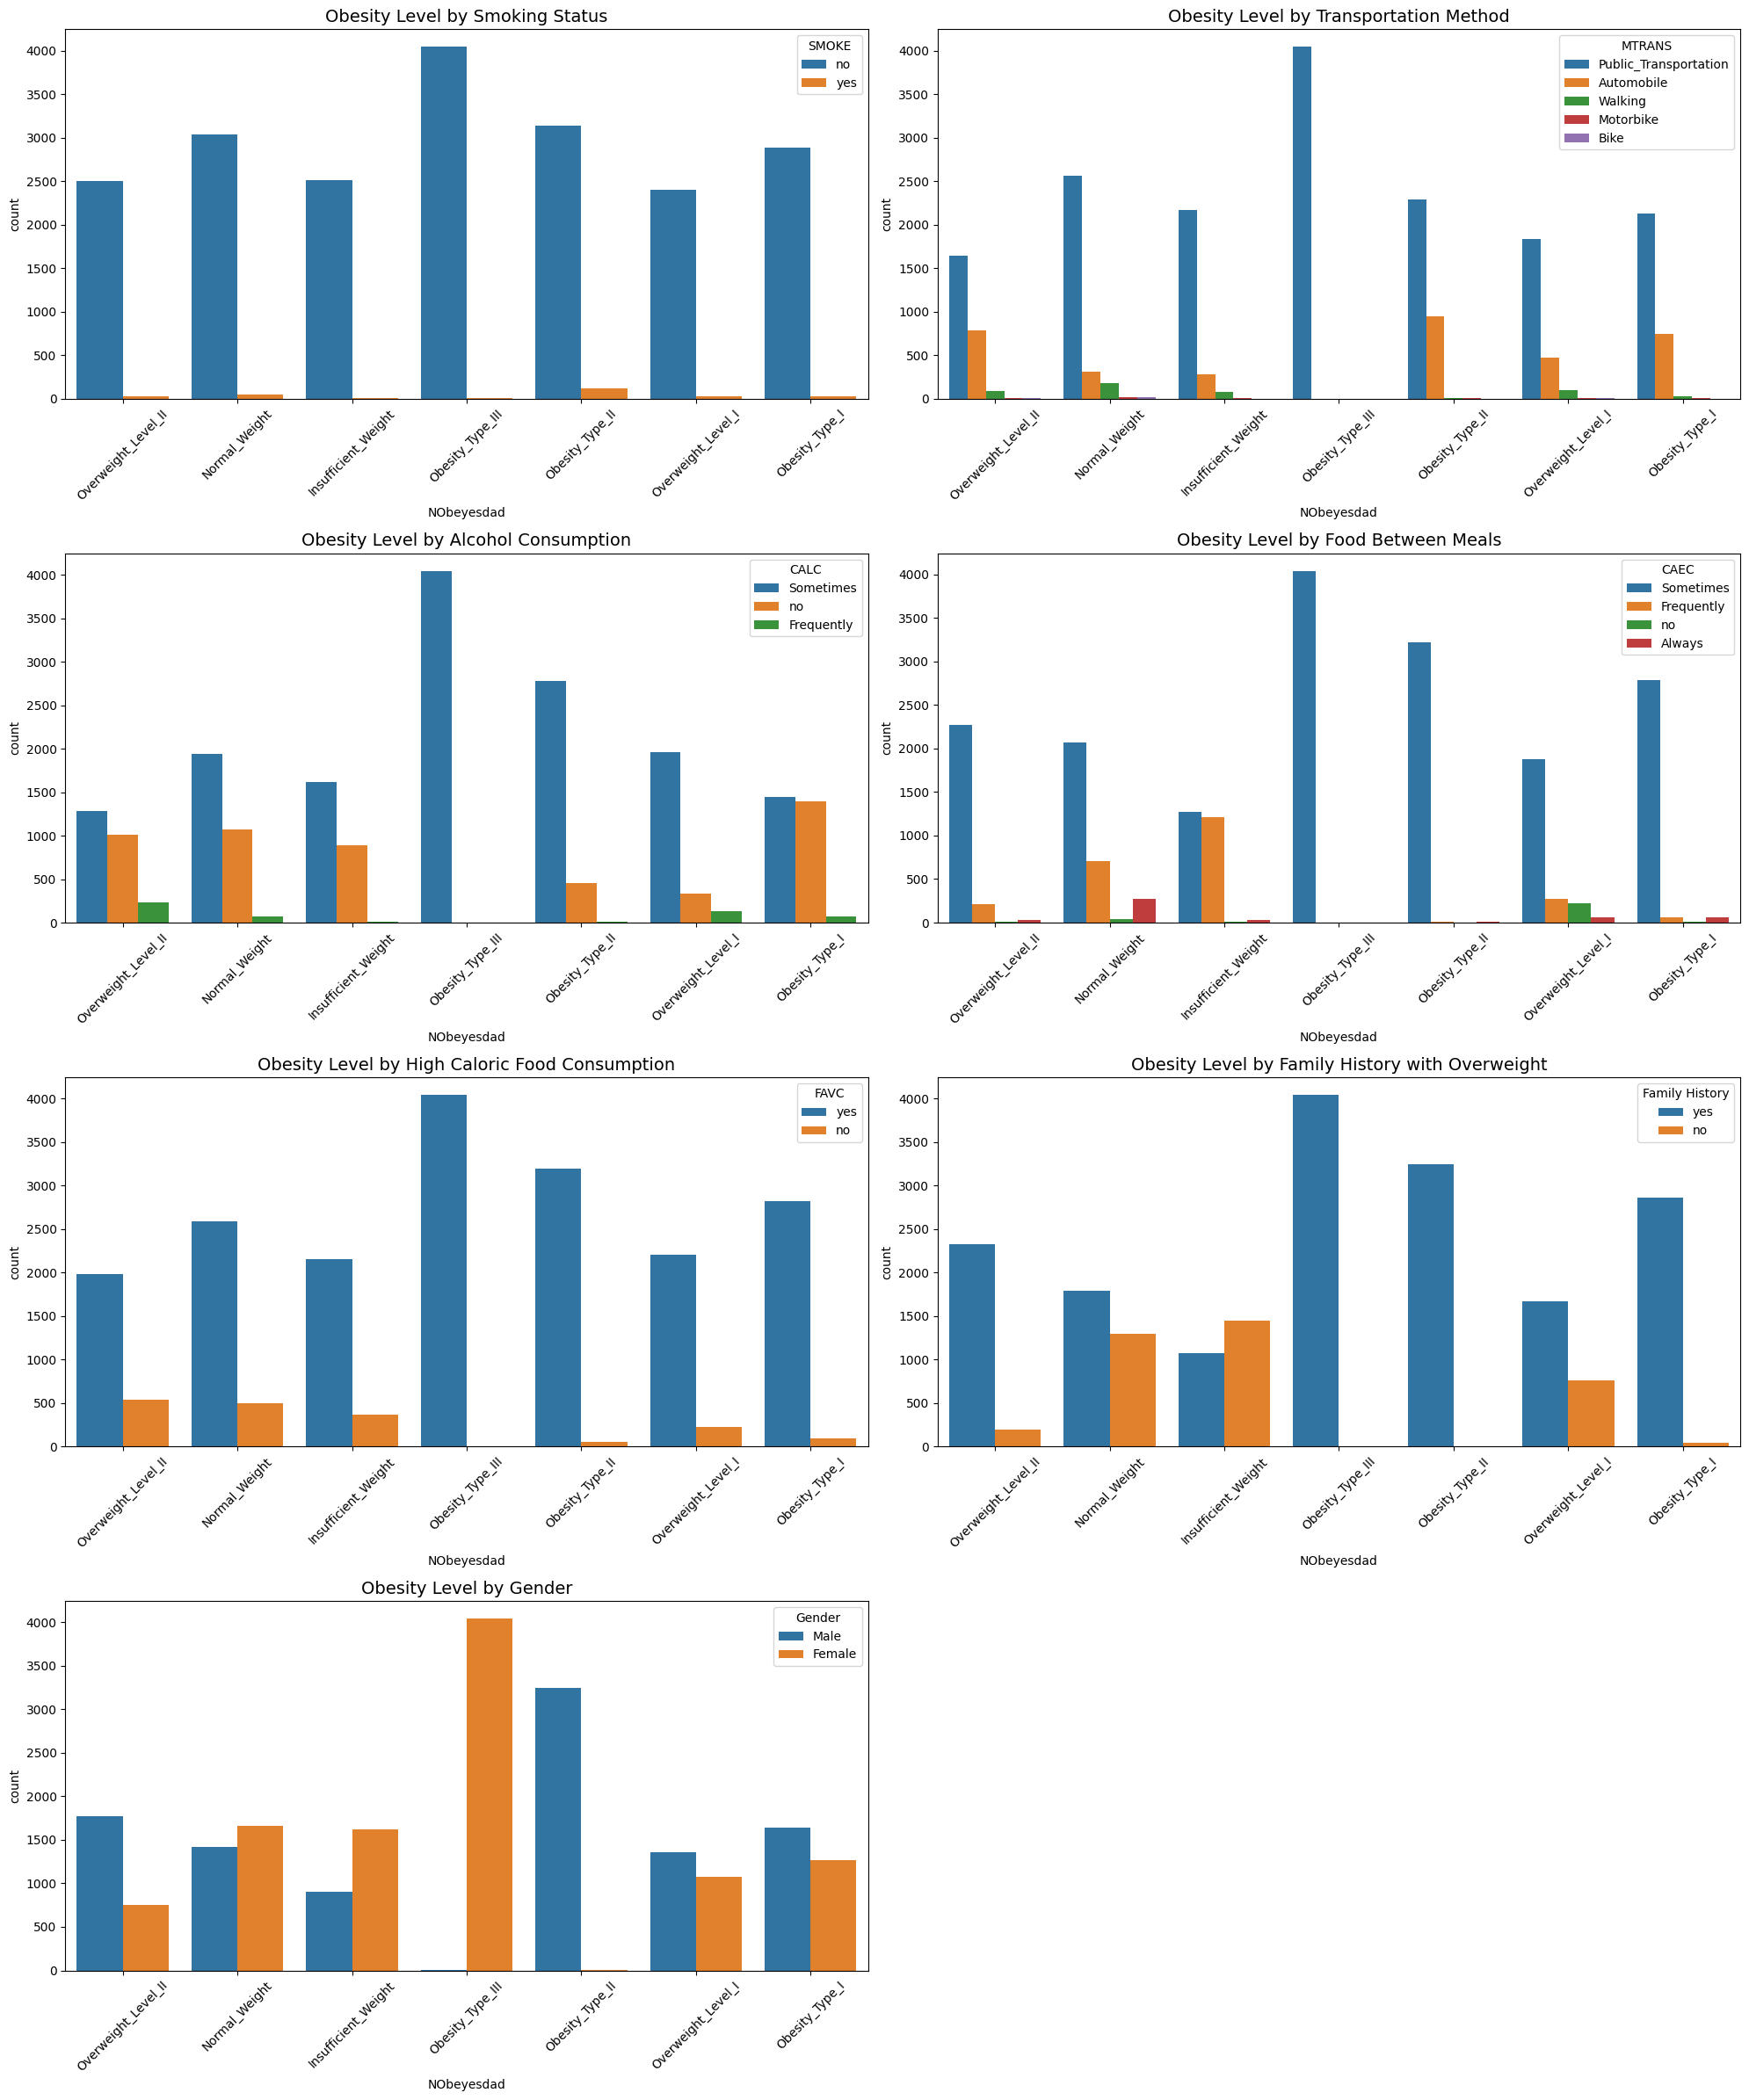

In [4]:
# Create a figure with subplots - 4x2 grid to have 8 subplots (we'll use 7)
fig, axes = plt.pyplot.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

# Plot for SMOKE
sns.countplot(x='NObeyesdad', hue='SMOKE', data=data, ax=axes[0])
axes[0].set_title('Obesity Level by Smoking Status', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='SMOKE')

# Plot for MTRANS
sns.countplot(x='NObeyesdad', hue='MTRANS', data=data, ax=axes[1])
axes[1].set_title('Obesity Level by Transportation Method', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='MTRANS')

# Plot for CALC
sns.countplot(x='NObeyesdad', hue='CALC', data=data, ax=axes[2])
axes[2].set_title('Obesity Level by Alcohol Consumption', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='CALC')

# Plot for CAEC
sns.countplot(x='NObeyesdad', hue='CAEC', data=data, ax=axes[3])
axes[3].set_title('Obesity Level by Food Between Meals', fontsize=14)
axes[3].tick_params(axis='x', rotation=45)
axes[3].legend(title='CAEC')

# Plot for FAVC
sns.countplot(x='NObeyesdad', hue='FAVC', data=data, ax=axes[4])
axes[4].set_title('Obesity Level by High Caloric Food Consumption', fontsize=14)
axes[4].tick_params(axis='x', rotation=45)
axes[4].legend(title='FAVC')

# Plot for family_history_with_overweight
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=data, ax=axes[5])
axes[5].set_title('Obesity Level by Family History with Overweight', fontsize=14)
axes[5].tick_params(axis='x', rotation=45)
axes[5].legend(title='Family History')

# Plot for gender
sns.countplot(x='NObeyesdad', hue='Gender', data=data, ax=axes[6])
axes[6].set_title('Obesity Level by Gender', fontsize=14)
axes[6].tick_params(axis='x', rotation=45)
axes[6].legend(title='Gender')

# Hide the unused subplot
axes[7].set_visible(False)

plt.pyplot.tight_layout()

Removerei:
- **SMOKE**: Por ser uma variável com pouca variabilidade na amostra.
- **GENDER**: Como não há índices de composição corporal e a distribuição entre homens e mulheres é praticamente igual, a distinção de gênero não agrega valor à análise. Segundo a OMS, o único critério relevante seria a circunferência abdominal, que não está presente no dataset.

# Histogramas de Variáveis Numéricas

Os histogramas de variáveis numéricas foram feitos pela extesão data wrangler do vscode.
Verifica-se que não há nenhum valor faltante.

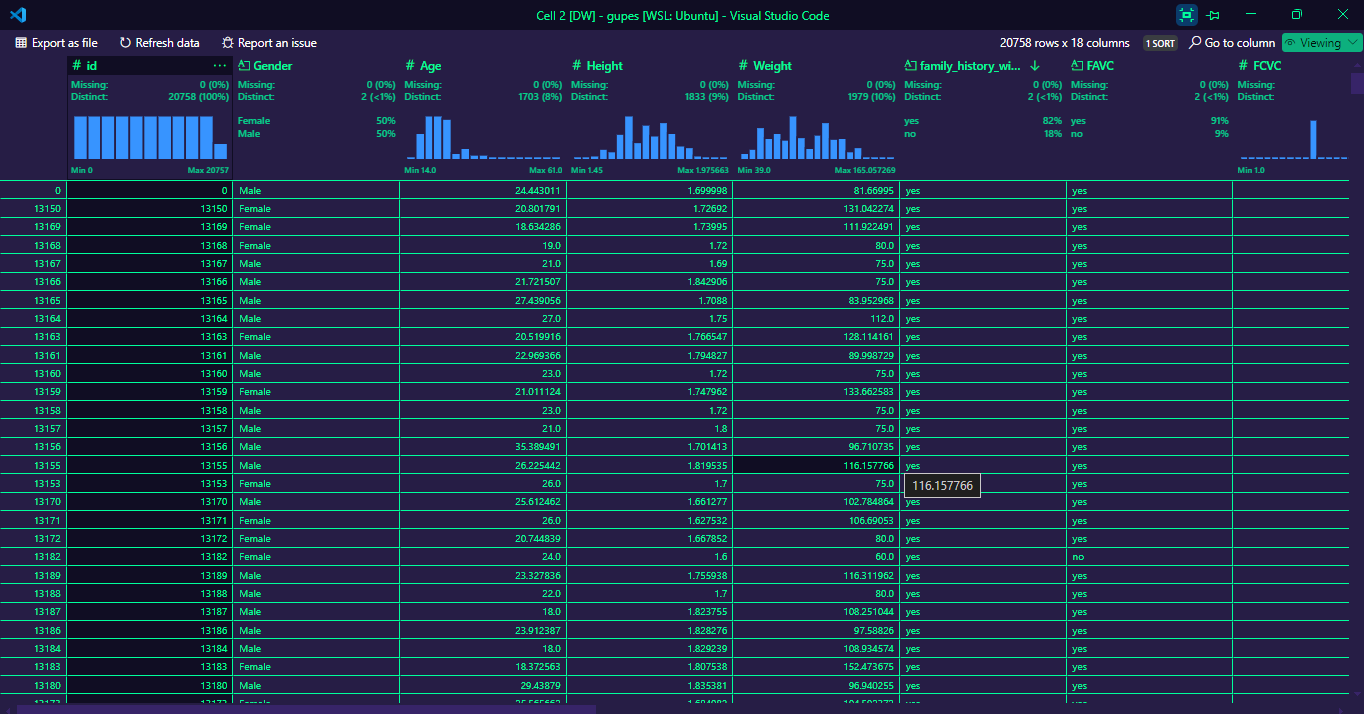

#

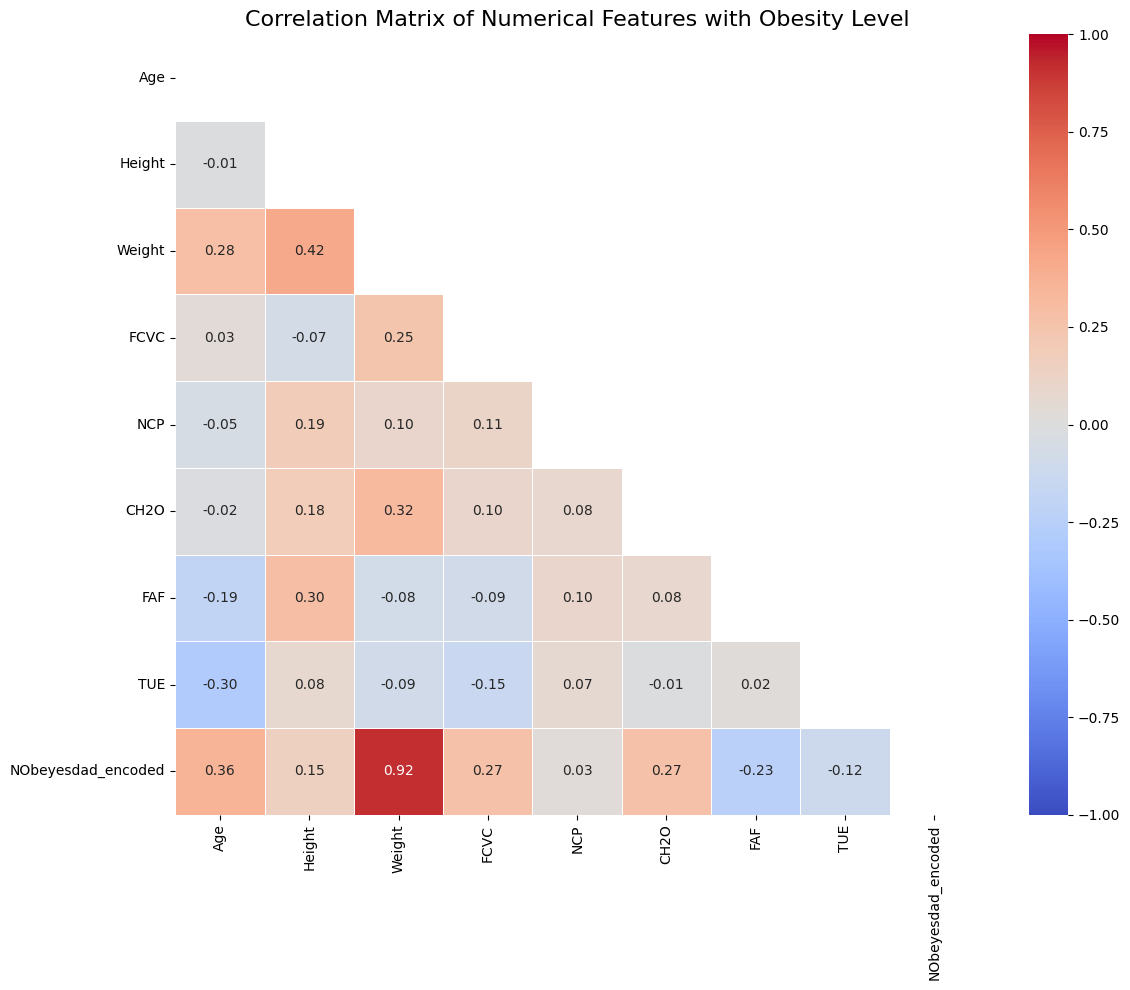

In [5]:
# Create a copy of the dataframe to avoid modifying the original
df_corr = data.copy()

# Encode the target variable (NObeyesdad)
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df_corr['NObeyesdad_encoded'] = df_corr['NObeyesdad'].map(target_mapping)

# Convert other categorical variables to dummy variables
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df_encoded = pd.get_dummies(df_corr, columns=categorical_cols, drop_first=True)

# Select only numerical columns for correlation
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad_encoded']
corr_matrix = df_encoded[numeric_cols].corr()

# Create a figure
plt.pyplot.figure(figsize=(12, 10))

# Create a heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
                      linewidths=0.5, vmin=-1, vmax=1)
plt.pyplot.title('Correlation Matrix of Numerical Features with Obesity Level', fontsize=16)
plt.pyplot.tight_layout()

In [8]:
def analyze_numeric_features(dataframe, features=None):
    """
    Analyze numeric features with descriptive statistics and normality test
    
    Parameters:
    dataframe: pandas DataFrame containing the data
    features: list of feature names to analyze (if None, analyze all numeric features)
    """
    if features is None:
        # Select only numeric columns
        features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for feature in features:
        print(f"\n{'='*50}")
        print(f"Analysis for: {feature}")
        print(f"{'='*50}")
        
        # Basic statistics
        print(f"Mean: {dataframe[feature].mean():.4f}")
        print(f"Median: {pd.Series(dataframe[feature]).median():.4f}")
        print(f"Std Dev: {dataframe[feature].std():.4f}")
        print(f"Skewness: {skew(dataframe[feature]):.4f}")
        print(f"Kurtosis: {kurtosis(dataframe[feature]):.4f}")
        
        # Shapiro-Wilk test
        # Limit to 5000 samples for performance if dataset is large
        sample = dataframe[feature].sample(min(5000, len(dataframe))) if len(dataframe) > 5000 else dataframe[feature]
        stat, p = shapiro(sample)
        print(f"Shapiro-Wilk p-value: {p:.10f}")
        
        if p > 0.05:
            print("Shapiro: Likely normal distribution")
        else:
            print("Shapiro: Likely NOT normal distribution")

# Example usage:
# Analyze specific numeric variables
# analyze_numeric_features(data, ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

# Or to analyze all numeric variables:
analyze_numeric_features(data)




Analysis for: id
Mean: 10378.5000
Median: 10378.5000
Std Dev: 5992.4628
Skewness: 0.0000
Kurtosis: -1.2000
Shapiro-Wilk p-value: 0.0000000000
Shapiro: Likely NOT normal distribution

Analysis for: Age
Mean: 23.8418
Median: 22.8154
Std Dev: 5.6881
Skewness: 1.5861
Kurtosis: 3.6994
Shapiro-Wilk p-value: 0.0000000000
Shapiro: Likely NOT normal distribution

Analysis for: Height
Mean: 1.7002
Median: 1.7000
Std Dev: 0.0873
Skewness: 0.0158
Kurtosis: -0.5598
Shapiro-Wilk p-value: 0.0000000000
Shapiro: Likely NOT normal distribution

Analysis for: Weight
Mean: 87.8878
Median: 84.0649
Std Dev: 26.3794
Skewness: 0.0932
Kurtosis: -0.9971
Shapiro-Wilk p-value: 0.0000000000
Shapiro: Likely NOT normal distribution

Analysis for: FCVC
Mean: 2.4459
Median: 2.3938
Std Dev: 0.5332
Skewness: -0.3566
Kurtosis: -0.8931
Shapiro-Wilk p-value: 0.0000000000
Shapiro: Likely NOT normal distribution

Analysis for: NCP
Mean: 2.7613
Median: 3.0000
Std Dev: 0.7054
Skewness: -1.5621
Kurtosis: 1.8365
Shapiro-Wilk p-